# 데이터 불러오기

In [1]:
# 필요한 모듈 불러오기
import pandas as pd
# 데이터 불러오기
df = pd.read_csv("C:/Users/tjoeun/Desktop/mm/xuyite/csv/preprocess.csv")
df.head()

,salary,Season,Age,G,GS,MP,FG,FGA,FG%,3P,...,STL,BLK,TOV,PF,PTS,pos_C,pos_PF,pos_PG,pos_SF,pos_SG
0,996827.0,1990,27.0,0.500000,0.592593,0.256801,-0.170905,-0.220114,0.614286,-0.266667,...,-0.042553,0.384615,0.034091,1.196429,-0.174579,1,0,0,0,0
1,1881882.0,1990,27.0,0.473684,1.037037,0.949229,0.887080,1.115750,-0.557143,2.316667,...,1.765957,-0.461538,0.840909,0.169643,1.140888,0,0,1,0,0
2,2543393.0,1990,30.0,0.447368,0.407407,0.474441,1.049847,0.943074,0.671429,0.200000,...,-0.085106,0.153846,0.613636,0.776786,0.954058,0,0,0,1,0
3,1653775.0,1990,30.0,0.368421,0.925926,0.974874,1.326551,1.428843,-0.042857,1.483333,...,1.595745,0.115385,1.340909,1.107143,1.326187,0,0,1,0,0
4,1140535.0,1990,26.0,0.552632,-0.148148,0.396812,0.777213,0.728653,0.457143,-0.150000,...,0.468085,0.923077,0.386364,0.937500,0.588055,0,1,0,0,0


In [2]:
# 컬럼명 확인
df.columns

Index(['salary', 'Season', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'pos_C',
       'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG'],
      dtype='object')

## 상관관계

In [4]:
# 연봉과의 관계도
# 제일 연봉에 가장 상관을 미칠만한 PTS(총득점수),FG(슛성공 2&3점),FGA(슛시도) 3가지를 분석
df.corr()['salary'].sort_values()

pos_SG   -0.043043
pos_PG   -0.031287
pos_SF   -0.016276
pos_PF    0.044526
pos_C     0.056068
3P%       0.083534
FT%       0.141413
2P%       0.156358
FG%       0.166426
G         0.168378
eFG%      0.187765
Age       0.191059
ORB       0.228445
Season    0.240419
PF        0.247670
BLK       0.270906
STL       0.307835
AST       0.353479
3P        0.355013
3PA       0.363588
MP        0.396813
TRB       0.397578
2PA       0.420347
TOV       0.423370
2P        0.435116
GS        0.443787
DRB       0.452142
FTA       0.460459
FT        0.466489
FGA       0.480788
FG        0.488444
PTS       0.504351
salary    1.000000
Name: salary, dtype: float64

<Figure size 640x480 with 0 Axes>

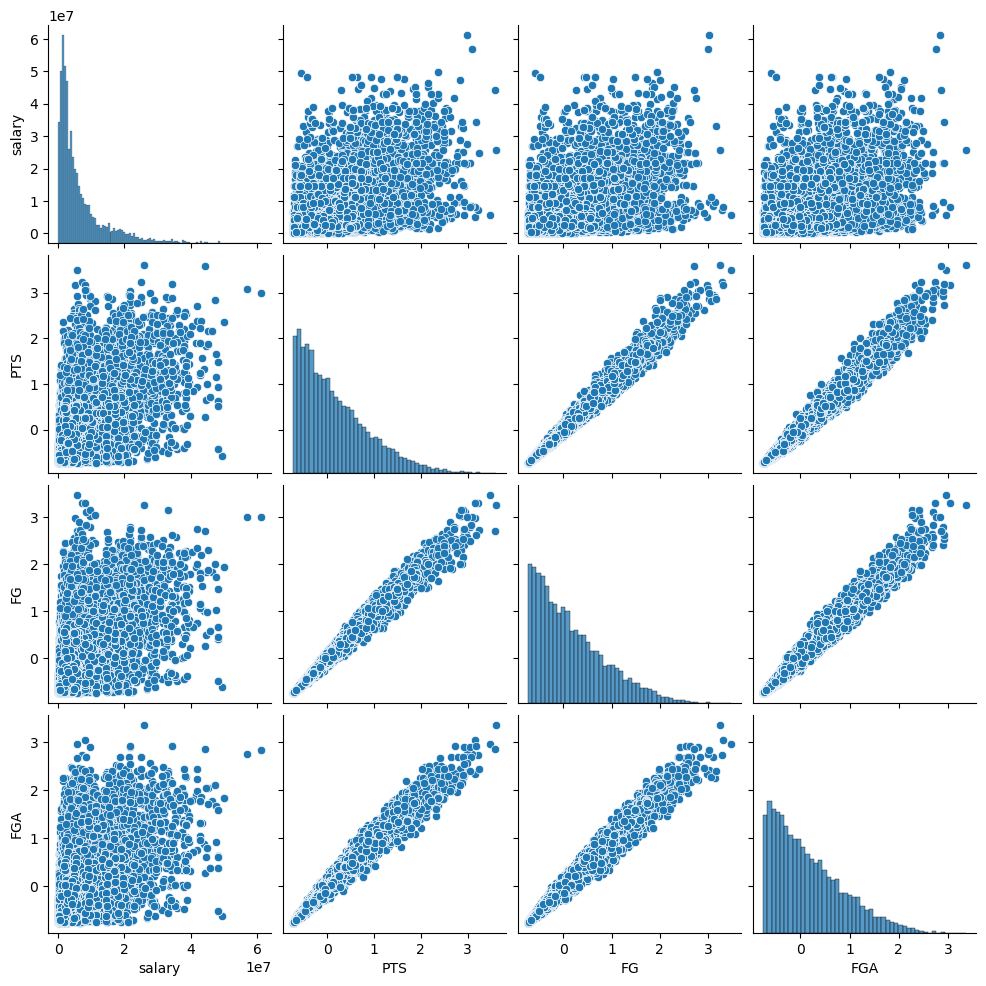

In [7]:
# 연봉과 PTS FG FGA 관계(pairplot)
import seaborn as sns
import matplotlib.pyplot as plt
# 3가지 변수와 연봉의 관계를 시각화
sns.pairplot(df[["salary", "PTS", "FG", "FGA"]])
plt.show()
# 양의 상관관계를 보이는것으로 보임

In [8]:
# 상관계수의 검점
# PTS ,FG, FGA 과 연봉의 상관관계
# Correlation(상관분석은 0.50에 가까워야  )
# 필요한 모듈 
import numpy as np
from scipy import stats
Y = df.salary.values
# 3가지 변수를 반복문을 통해 결과값을 분석
for item in ['PTS','FG','FGA']:
    print(item)
    X = df[item].values
    print ('Covariancce : {:.2f}'.format(np.cov(X,Y)[0,1])) # 공분산
    print ('Correlation : {:.2f}'.format(stats.pearsonr(X,Y)[0])) # 상관분석
    print ('P-value : {:.4f}'.format(stats.pearsonr(X,Y)[1])) # P-밸류
    print('\n') 

PTS
Covariancce : 2743306.99
Correlation : 0.50
P-value : 0.0000


FG
Covariancce : 2606309.57
Correlation : 0.49
P-value : 0.0000


FGA
Covariancce : 2533046.29
Correlation : 0.48
P-value : 0.0000


